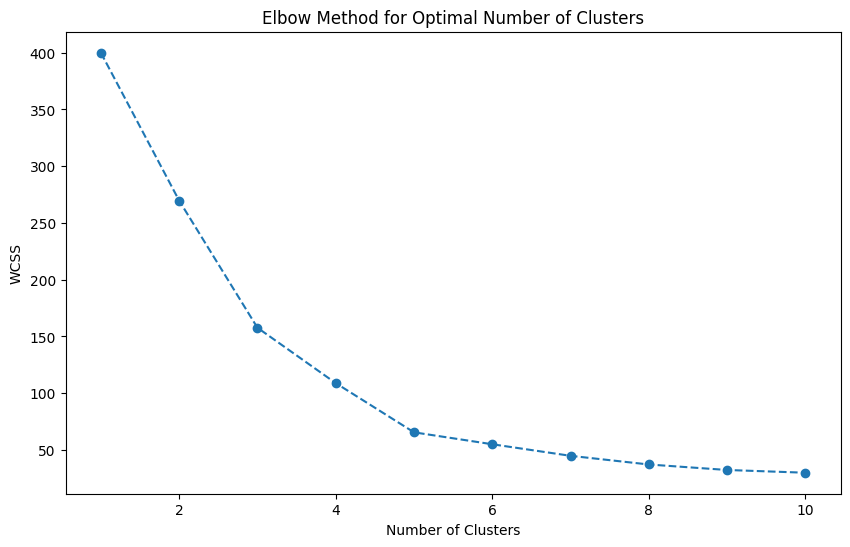

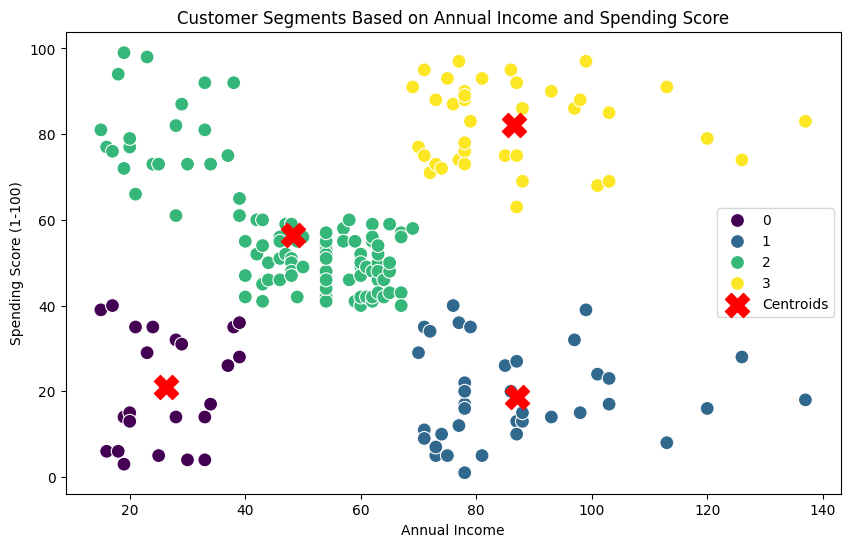

Centroids of the clusters:
    Annual Income (k$)  Spending Score (1-100)
0           26.304348               20.913043
1           87.000000               18.631579
2           48.260000               56.480000
3           86.538462               82.128205

Cluster Analysis:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 26.304348               20.913043
1                 87.000000               18.631579
2                 48.260000               56.480000
3                 86.538462               82.128205


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\midhu\Downloads\Mall_Customers.csv")

# Select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters from the elbow plot (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = y_kmeans

# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], 
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], 
            s=300, c='red', label='Centroids', marker='X')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Display the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print("Centroids of the clusters:\n", centroid_df)

# Optional: Analyze each cluster by displaying mean values
cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Analysis:\n", cluster_analysis)
